In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
'''Interpretación de las columnas del DataFrame del Titanic:
1. PassengerId: Identificador único de cada pasajero a bordo del Titanic.
2. Survived: Indica si el pasajero sobrevivió (1) o no (0) al naufragio.
3. Pclass: Clase de viaje del pasajero (1: Primera clase, 2: Segunda clase, 3: Tercera clase).
4. Name: Nombre completo del pasajero.
5. Sex: Sexo del pasajero ('male' o 'female').
6. Age: Edad del pasajero en años.
7. SibSp: Número de hermanos y/o cónyuges a bordo del Titanic.
8. Parch: Número de padres e hijos a bordo del Titanic.
9. Ticket: Número de identificación del billete del pasajero.
10. Fare: Tarifa pagada por el pasajero por su viaje.
11. Cabin: Número de la cabina asignada al pasajero (si la tenía).
12. Embarked: Puerto de embarque del pasajero (C: Cherbourg, Q: Queenstown, S: Southampton).'''
df = pd.read_csv('data/Titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Caso:
A partir del fichero del Titanic, realizar los siguiente:

1. Realice un resumen estadístico de su base de datos (Incluya medidas
de tendencia central, medidas de dispersión y al menos dos gráficos
que representen los datos hallados.

In [161]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


La mayoría de los pasajeros tenían tickets de tercera clase. Su cantidad era 
aproximadamente el doble que la suma de las otras dos categorías juntas.



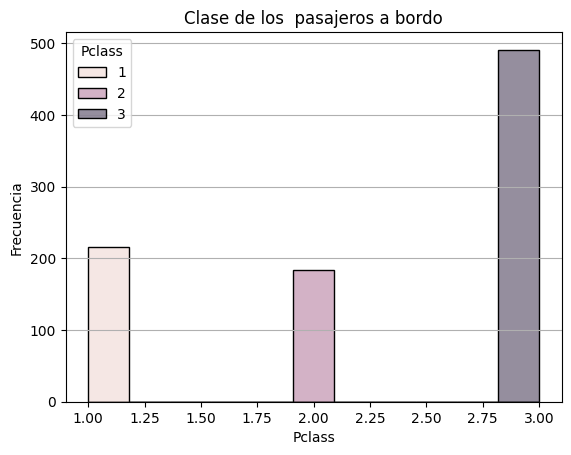

In [233]:
sns.histplot(data=df,x = 'Pclass',hue='Pclass')
plt.ylabel('Frecuencia')
plt.title('Clase de los  pasajeros a bordo')
plt.grid(axis='y')
print('''La mayoría de los pasajeros tenían tickets de tercera clase. Su cantidad era 
aproximadamente el doble que la suma de las otras dos categorías juntas.
''')

Los pasajeros con tickets de primera clase fueron los que tuvieron la mayor tasa de supervivencia.
Probablemente, al momento de evacuar en esta emergencia, fueron considera dos de los primeros junto 
a niños y mujeres.

Considerando el enunciado del gráfico anterior y la información proporcionada por este, podemos
concluir que la mayoría de los pasajeros con tickets de tercera clase no lograron sobrevivir a 
la catástrofe.


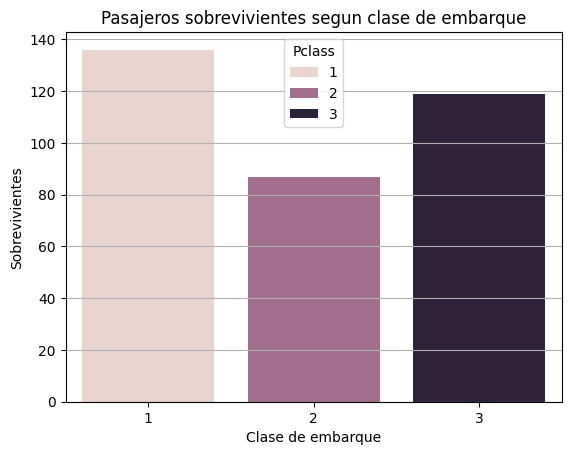

In [247]:
survived = df[['Survived','Pclass']]
survived = survived.groupby('Pclass').sum()
sns.barplot(data= survived, x='Pclass',y='Survived',hue='Pclass')
plt.title('Pasajeros sobrevivientes segun clase de embarque')
plt.ylabel('Sobrevivientes')
plt.xlabel('Clase de embarque')
plt.grid(axis='y')
print('''Los pasajeros con tickets de primera clase fueron los que tuvieron la mayor tasa de supervivencia.
Probablemente, al momento de evacuar en esta emergencia, fueron considerados de los primeros junto 
a niños y mujeres.

Considerando el enunciado del gráfico anterior y la información proporcionada por este, podemos
concluir que la mayoría de los pasajeros con tickets de tercera clase no lograron sobrevivir a 
la catástrofe.''')

In [65]:
mean_sex = df['Sex'].value_counts()
men = mean_sex.iloc[0]
women = mean_sex.iloc[1]


Sex
male      577
female    314
Name: count, dtype: int64

 2. Confeccione un gráfico de barras para visualizar hombres y mujeres
que han sobrevivido (Agregue una tabla de contingencia porcentual)

Text(0.5, 1.0, 'Sobrevivientes Titanic segun su genero')

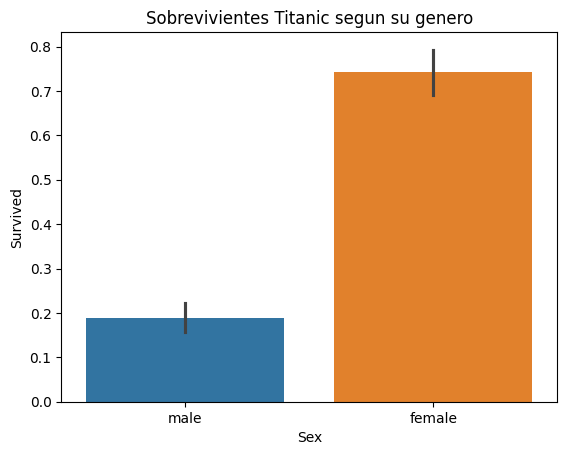

In [254]:
# Grafico de barras
sns.barplot(x='Sex', y = 'Survived', data = df, hue='Sex')
plt.title('Sobrevivientes Titanic segun su genero')
#Tabla de contingencia porcentual

In [5]:
 
total = df['Sex'].count()
tabla = pd.crosstab(df['Sex'],df['Survived'])
tabla = tabla.rename(columns= {0:'No sobrevive',1:'Sobrevive'})
generos= pd.crosstab(df['Survived'],df['Sex'])




3. Realice un gráfico adecuado para mostrar la edad de los pasajeros a
bordo, realice el mismo gráfico pero para cada género, compárelos y
entregue una conclusión respecto al conjunto completo y separado por
géneros. Sea ordenado creado los gráficos


Se estima que gran parte  de los pasajeros tenia entre 15-35 años de edad aproximadamente.
Entre los niños la mayoria eran menores a los 5 años. Sin considerar a los mayores de 15 años.



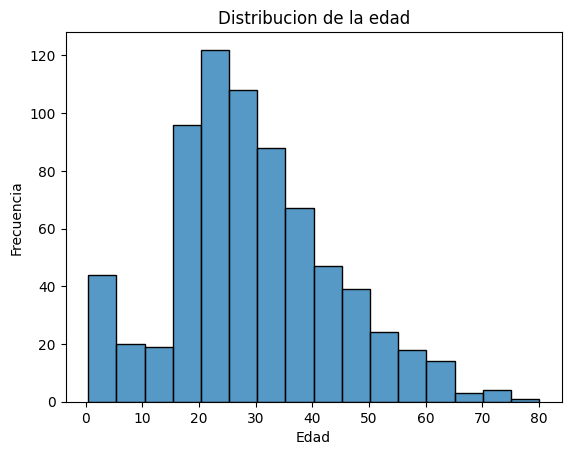

In [257]:
sns.histplot(data=df,x='Age',binwidth=5)
plt.title('Distribucion de la edad')
plt.ylabel('Frecuencia')
plt.xlabel('Edad')
print('''
Se estima que gran parte  de los pasajeros tenia entre 15-35 años de edad aproximadamente.
Entre los niños la mayoria eran menores a los 5 años. Sin considerar a los mayores de 15 años.
''')

Se estima que los pasajeros en su mayoria eran de sexo masculino, jovenes pertenecientes
al rango de los 15-35 años de edad. 
      
La cantidad de mujeres a bordo siguen un patron de distribucion en donde su decrecimiento es bastante lineal.
En el rango de los 10 a 15 años es el unico segmento en donde hay más niñas que niños 


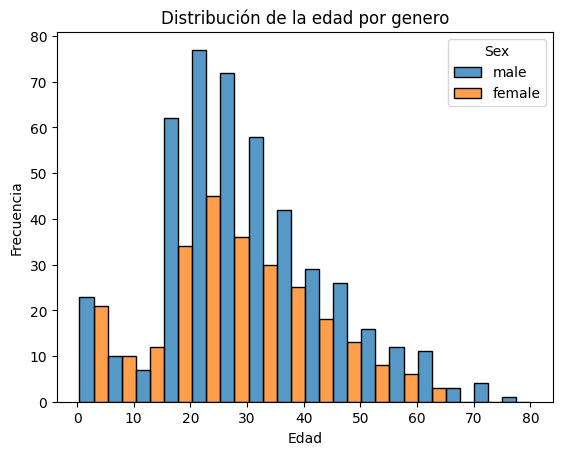

In [258]:
sns.histplot(data=df, x='Age',hue='Sex',binwidth=5, multiple = "dodge")
plt.title('Distribución de la edad por genero')
plt.ylabel('Frecuencia')
plt.xlabel('Edad')
print('''Se estima que los pasajeros en su mayoria eran de sexo masculino, jovenes pertenecientes
al rango de los 15-35 años de edad. 
      
La cantidad de mujeres a bordo siguen un patron de distribucion en donde su decrecimiento es bastante lineal.
En el rango de los 10 a 15 años es el unico segmento en donde hay más niñas que niños ''')

4. Agregue un análisis extra luego de elaborar un Boxplot que incluya las
variables del género y edad de los pasajeros.

<Axes: xlabel='Sex', ylabel='Age'>

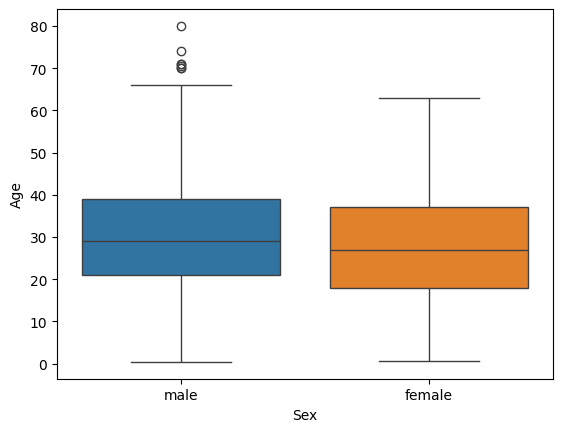

In [262]:
sns.boxplot(data=df,x='Sex',y='Age',hue='Sex')
